In [19]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from pyproj import Proj, transform
import cmocean
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [20]:
ds = xr.open_dataset('noaav4_nh_monthly_sic_1978_2024.nc')
ds

<xarray.Dataset> Size: 2GB
Dimensions:                                 (time: 545, tdim: 1, y: 448, x: 304)
Coordinates:
  * time                                    (time) datetime64[ns] 4kB 1978-11...
    xgrid                                   (x) float32 1kB ...
    ygrid                                   (y) float32 2kB ...
Dimensions without coordinates: tdim, y, x
Data variables:
    cdr_seaice_conc_monthly                 (time, tdim, y, x) float32 297MB ...
    melt_onset_day_cdr_seaice_conc_monthly  (time, tdim, y, x) float32 297MB ...
    nsidc_bt_seaice_conc_monthly            (time, tdim, y, x) float32 297MB ...
    nsidc_nt_seaice_conc_monthly            (time, tdim, y, x) float32 297MB ...
    projection                              (time) |S1 545B ...
    qa_of_cdr_seaice_conc_monthly           (time, tdim, y, x) float32 297MB ...
    stdev_of_cdr_seaice_conc_monthly        (time, tdim, y, x) float32 297MB ...
Attributes: (12/41)
    Conventions:               CF-1.6, ACDD-1.3
    title:                     NOAA/NSIDC Climate Data Record of Passive Micr...
    comment:                   none
    program:                   NOAA Climate Data Record Program
    cdr_variable:              cdr_seaice_conc_monthly
    metadata_link:             https://nsidc.org/data/g02202/versions/4/
    ...                        ...
    platform:                  NIMBUS-7
    sensor:                    SMMR > Scanning Multichannel Microwave Radiometer
    date_created:              2021-06-22T16:08:07Z
    time_coverage_start:       1987-04-01T00:00:00Z
    time_coverage_end:         1987-04-30T23:59:59Z
    references:                Comiso, J. C., and F. Nishio. 2008. Trends in ...

In [21]:
# Get variables
time = ds.time.values
xgrid = ds.xgrid.values
ygrid = ds.ygrid.values

# Get data
sic = ds.cdr_seaice_conc_monthly.values
sic_reshaped = sic.reshape((sic.shape[0], sic.shape[2], sic.shape[3]))
sic_reshaped.shape

(545, 448, 304)

In [64]:
# Define the projection: polar stereographic
proj_in = Proj(proj='stere', lat_0=90, lon_0=0, x_0=0, y_0=0, datum='WGS84')

# Define WGS84 (lat/lon) projection
proj_out = Proj(proj='latlong', datum='WGS84')

# Prepare the coordinates for the transformation
lats = np.zeros((int(xgrid.shape[0])))
lons = np.zeros((int(ygrid.shape[0])))

# Convert to lat/lon
for i, x in enumerate(xgrid):
    for j, y in enumerate(ygrid):
        lats[i], lons[j] = proj_in(x, y, inverse=True)[0], proj_in(x, y, inverse=True)[1]

# Conver to numpy arrays
lons = np.array(lons)
lats = np.array(lats)

# Remove NaNs
lons = lons[np.isfinite(lons)]
lats = lats[np.isfinite(lats)]


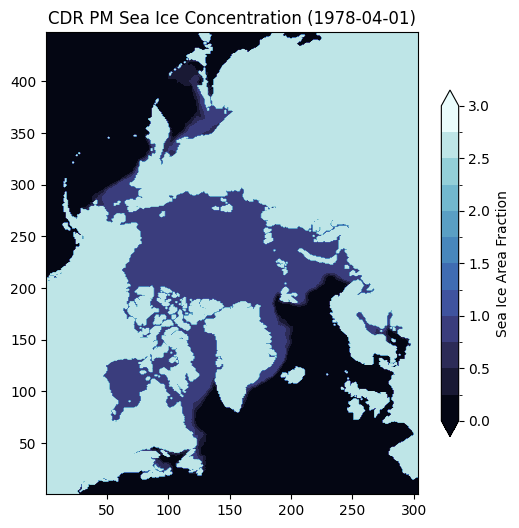

In [65]:
# Define the boundaries for the discrete intervals
boundaries = np.linspace(np.floor(sic_reshaped[0].min()), np.ceil(sic_reshaped[0].max()), 13)

# Create a normalization object
norm = BoundaryNorm(boundaries, ncolors=cmocean.cm.ice.N, clip=True)

# Plot the data
plt.figure(figsize=(6, 6))
plt.contourf(sic_reshaped[0], cmap=cmocean.cm.ice, norm=norm, levels=boundaries, extend='both', origin='upper')

# Add a colorbar
plt.colorbar(orientation='vertical', shrink=0.75, pad=0.05, label='Sea Ice Area Fraction')

plt.title('CDR PM Sea Ice Concentration (1978-04-01)')
plt.show()